In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font='Yu Gothic')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('2軍野手_2.csv',index_col=1)
df.head()

,チ ー ム,レベル,試 合,打 席,打 数,得 点,安 打,二 塁 打,三 塁 打,本 塁 打,...,出 塁 率,O P S,NOI,GPA,IsoD,IsoP,BABIP,BB/K,PA/K,AB/HR
選 手 名,,,,,,,,,,,,,,,,,,,,,
メヒア,C,1,76,302,270,48,91,19,3,20,...,0.397,1.049,614.333333,0.34165,0.060,0.315,0.358586,0.454545,5.490909,13.5
川瀬 晃,H,2,92,334,286,44,84,5,4,0,...,0.371,0.710,484.000000,0.25170,0.077,0.045,0.333333,0.948718,8.564103,#DIV/0!
板山 祐太郎,T,2,94,391,349,54,98,19,4,5,...,0.353,0.754,486.666667,0.25910,0.072,0.120,0.344444,0.526316,5.144737,69.8
釜元 豪,H,2,90,326,285,50,80,11,11,8,...,0.349,0.830,509.333333,0.27730,0.068,0.200,0.365482,0.341463,3.975610,35.625
溝脇 隼人,D,2,90,340,319,33,88,11,5,1,...,0.314,0.665,431.000000,0.22905,0.038,0.075,0.302083,0.580645,10.967742,319


In [3]:
df = df.replace('#DIV/0!',1000)
df.head()

,チ ー ム,レベル,試 合,打 席,打 数,得 点,安 打,二 塁 打,三 塁 打,本 塁 打,...,出 塁 率,O P S,NOI,GPA,IsoD,IsoP,BABIP,BB/K,PA/K,AB/HR
選 手 名,,,,,,,,,,,,,,,,,,,,,
メヒア,C,1,76,302,270,48,91,19,3,20,...,0.397,1.049,614.333333,0.34165,0.060,0.315,0.358586,0.454545,5.490909,13.5
川瀬 晃,H,2,92,334,286,44,84,5,4,0,...,0.371,0.710,484.000000,0.25170,0.077,0.045,0.333333,0.948718,8.564103,1000
板山 祐太郎,T,2,94,391,349,54,98,19,4,5,...,0.353,0.754,486.666667,0.25910,0.072,0.120,0.344444,0.526316,5.144737,69.8
釜元 豪,H,2,90,326,285,50,80,11,11,8,...,0.349,0.830,509.333333,0.27730,0.068,0.200,0.365482,0.341463,3.975610,35.625
溝脇 隼人,D,2,90,340,319,33,88,11,5,1,...,0.314,0.665,431.000000,0.22905,0.038,0.075,0.302083,0.580645,10.967742,319


In [4]:
X = df.drop(df.columns[:2], axis=1)
X.head()

,試 合,打 席,打 数,得 点,安 打,二 塁 打,三 塁 打,本 塁 打,塁 打,打 点,...,出 塁 率,O P S,NOI,GPA,IsoD,IsoP,BABIP,BB/K,PA/K,AB/HR
選 手 名,,,,,,,,,,,,,,,,,,,,,
メヒア,76,302,270,48,91,19,3,20,176,59,...,0.397,1.049,614.333333,0.34165,0.060,0.315,0.358586,0.454545,5.490909,13.5
川瀬 晃,92,334,286,44,84,5,4,0,97,32,...,0.371,0.710,484.000000,0.25170,0.077,0.045,0.333333,0.948718,8.564103,1000
板山 祐太郎,94,391,349,54,98,19,4,5,140,36,...,0.353,0.754,486.666667,0.25910,0.072,0.120,0.344444,0.526316,5.144737,69.8
釜元 豪,90,326,285,50,80,11,11,8,137,42,...,0.349,0.830,509.333333,0.27730,0.068,0.200,0.365482,0.341463,3.975610,35.625
溝脇 隼人,90,340,319,33,88,11,5,1,112,16,...,0.314,0.665,431.000000,0.22905,0.038,0.075,0.302083,0.580645,10.967742,319


In [5]:
X.isnull().values.sum() != 0

False

In [6]:
Y = df[[df.columns[1]]]
Y.head()

,レベル
選 手 名,
メヒア,1
川瀬 晃,2
板山 祐太郎,2
釜元 豪,2
溝脇 隼人,2


In [7]:
sc = StandardScaler()
X_std = sc.fit_transform(X)
pd.DataFrame(X_std, index=df.index, columns=X.columns).head()

,試 合,打 席,打 数,得 点,安 打,二 塁 打,三 塁 打,本 塁 打,塁 打,打 点,...,出 塁 率,O P S,NOI,GPA,IsoD,IsoP,BABIP,BB/K,PA/K,AB/HR
選 手 名,,,,,,,,,,,,,,,,,,,,,
メヒア,-1.153040,-0.963105,-0.875969,0.631063,0.402329,1.088578,0.063512,2.326939,1.754733,1.291224,...,1.550777,2.774470,2.367504,2.580668,-0.443117,2.960701,1.139836,-0.265509,-0.301811,-0.582772
川瀬 晃,-0.094217,-0.445206,-0.593938,0.254975,-0.017272,-1.765916,0.531914,-1.197821,-0.914592,-0.453407,...,0.902931,-0.153104,0.290852,0.078433,0.369399,-1.301745,0.490885,1.707337,1.108371,2.805920
板山 祐太郎,0.038136,0.477301,0.516559,1.195195,0.821930,1.088578,0.531914,-0.316631,0.538332,-0.194943,...,0.454422,0.226876,0.333341,0.284286,0.130424,-0.117732,0.776423,0.021014,-0.460657,-0.389377
釜元 豪,-0.226570,-0.574681,-0.611565,0.819107,-0.257043,-0.542561,3.810724,0.212083,0.436965,0.192753,...,0.354753,0.883205,0.694498,0.790575,-0.060756,1.145215,1.317062,-0.716957,-0.997129,-0.506771
溝脇 隼人,-0.226570,-0.348100,-0.012249,-0.779267,0.222500,-0.542561,1.000315,-1.021583,-0.407758,-1.487262,...,-0.517348,-0.541721,-0.553618,-0.551646,-1.494610,-0.828140,-0.312192,0.237909,2.211317,0.466641


In [8]:
X_train,X_test,Y_train,Y_test = train_test_split(X_std,Y,test_size=0.25)

In [9]:
RF = RandomForestClassifier()
RF_param = {
    'max_depth' : [3,5,8,10,13,15],
    'n_estimators' : [20,40,60,80,100],
    'max_features' : [5,10,20,25]
}
RF_grid = GridSearchCV(RF,RF_param)
RF_grid.fit(X_train,Y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
           

In [10]:
RF_grid.best_params_

{'max_depth': 3, 'max_features': 5, 'n_estimators': 20}

In [11]:
pre = RF_grid.predict(X_test)
acc = accuracy_score(pre,Y_test)
auc = roc_auc_score(pre,Y_test)
print('\t{0:5s} : {1:>0.5f}'.format('正解率',acc))
print('\t{0:5s} : {1:>0.5f}'.format('ＡＵＣ',auc))

	正解率   : 0.66667
	ＡＵＣ   : 0.80769


In [12]:
pca = PCA()
X_pc = pca.fit_transform(X_std)
pd.DataFrame(X_pc,index=df.index,columns=['PC{}'.format(x+1) for x in range(len(X.columns))]).head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29
選 手 名,,,,,,,,,,,,,,,,,,,,,
メヒア,7.686669,0.033002,-1.164163,-1.088923,-0.057339,0.464687,-1.347620,2.212113,-0.462030,0.043807,...,-0.013662,0.017676,0.066262,0.002352,-0.000246,2.728352e-11,-8.122895e-16,9.688060e-16,8.681939e-16,2.245508e-17
川瀬 晃,-0.668651,2.418526,3.436432,0.313958,0.405667,-0.687987,-1.742008,-1.733567,0.853749,-1.259227,...,0.106428,-0.002785,0.008399,0.001697,0.000590,-1.367934e-11,1.589653e-15,3.039289e-16,4.818146e-16,3.222038e-16
板山 祐太郎,1.149955,-1.432876,1.073466,-0.200575,-0.504172,-1.048251,0.919692,-0.822959,-0.862838,-0.101635,...,0.019375,0.091880,-0.024527,0.001021,-0.000858,-4.440067e-10,-2.444414e-15,-3.121024e-17,-6.037757e-16,-1.762309e-16
釜元 豪,2.119830,-0.097917,0.167059,0.255832,-3.053780,2.180684,-1.493997,-1.161790,-1.730188,0.058202,...,-0.001075,0.085787,0.027562,-0.001207,-0.000353,-2.693564e-11,4.035916e-15,4.902811e-16,-1.015943e-16,4.756036e-17
溝脇 隼人,-1.956981,1.917792,1.205992,-2.828252,-0.459812,-0.075035,-0.142282,-0.643780,-0.912874,0.377303,...,-0.054190,-0.147191,-0.017233,0.002684,-0.000821,3.219700e-11,1.468902e-15,-1.217009e-16,4.282048e-16,-2.720899e-16


In [13]:
pd.DataFrame(pca.components_,index=['PC{}'.format(x+1) for x in range(len(X.columns))],columns=X.columns).head(10)

,試 合,打 席,打 数,得 点,安 打,二 塁 打,三 塁 打,本 塁 打,塁 打,打 点,...,出 塁 率,O P S,NOI,GPA,IsoD,IsoP,BABIP,BB/K,PA/K,AB/HR
PC1,-0.136950,-0.086382,-0.091896,0.130336,0.096752,0.112952,-0.028098,0.240495,0.207527,0.208366,...,0.285719,0.340445,0.331164,0.337939,0.062690,0.280966,0.213958,0.076265,-0.008258,-0.106350
PC2,-0.299833,-0.352621,-0.358337,-0.263512,-0.296223,-0.256889,-0.032091,-0.150491,-0.300736,-0.251499,...,0.120655,0.051039,0.082591,0.067736,0.112814,-0.023019,-0.041645,0.237584,0.195738,0.048436
PC3,0.195061,0.164074,0.125820,0.223485,0.260990,-0.031771,0.220740,-0.282582,0.011165,-0.077664,...,0.215058,-0.007230,0.087123,0.042053,0.082225,-0.258895,0.155227,0.284732,0.246830,0.345812
PC4,0.046330,0.034910,-0.045932,0.088731,-0.163670,-0.150341,-0.087062,0.069042,-0.090022,-0.012530,...,0.109533,-0.025587,0.030983,0.003884,0.546351,-0.005036,0.047142,0.071102,-0.271216,0.047905
PC5,0.025431,0.086262,0.053585,0.068055,-0.038182,0.149085,-0.328795,0.139010,0.035702,0.164306,...,-0.038536,-0.016427,-0.026655,-0.021997,0.144219,0.066066,-0.466391,0.375953,0.369069,-0.066751
PC6,-0.006265,0.016199,-0.030786,0.251133,-0.071217,0.025111,0.231108,0.062104,0.033081,-0.059029,...,-0.071496,0.044662,-0.003009,0.020006,-0.047818,0.156454,-0.168119,-0.010494,0.110308,-0.247740
PC7,0.024334,0.041373,0.012597,-0.020946,-0.006681,0.251681,-0.406047,0.000696,-0.020239,-0.080214,...,0.027985,-0.023398,-0.002695,-0.012902,0.102696,-0.045013,0.005126,0.090293,-0.015129,-0.347371
PC8,0.094216,0.027334,0.031051,-0.092632,0.016346,0.042062,-0.176959,-0.011697,-0.016073,-0.088509,...,-0.018148,-0.001425,-0.008617,-0.005205,-0.045838,0.005240,0.024228,-0.067989,-0.045764,-0.141962
PC9,0.058393,-0.011791,-0.056783,0.060850,0.077723,-0.167061,-0.526535,-0.033716,-0.079232,0.066804,...,0.139641,0.006711,0.064155,0.037237,-0.058011,-0.182356,0.262162,-0.096119,0.008207,0.141274
PC10,0.044953,0.050996,0.048385,-0.079437,0.022647,0.220630,0.296893,0.009732,0.097760,-0.065597,...,0.000025,0.028464,0.017377,0.022746,0.127555,0.093721,-0.081852,0.036716,0.226895,0.116927


In [14]:
pd.DataFrame(pca.explained_variance_ratio_,index=['PC{}'.format(x+1) for x in range(len(X.columns))],columns=['寄与率']).head(10)

,寄与率
PC1,0.289294
PC2,0.224579
PC3,0.117046
PC4,0.089606
PC5,0.060054
PC6,0.037702
PC7,0.035405
PC8,0.032035
PC9,0.026543
PC10,0.024414


In [15]:
pd.DataFrame(np.cumsum(pca.explained_variance_ratio_),index=['PC{}'.format(x+1) for x in range(len(X.columns))],columns=['累積寄与率']).head(10)

,累積寄与率
PC1,0.289294
PC2,0.513873
PC3,0.630919
PC4,0.720526
PC5,0.780580
PC6,0.818282
PC7,0.853687
PC8,0.885722
PC9,0.912265
PC10,0.936679


In [16]:
pd.DataFrame(pca.explained_variance_,index=['PC{}'.format(x+1) for x in range(len(X.columns))],columns=['固有値']).head(10)

,固有値
PC1,8.534181
PC2,6.625066
PC3,3.452871
PC4,2.643387
PC5,1.771590
PC6,1.112216
PC7,1.044444
PC8,0.945033
PC9,0.783019
PC10,0.720208


In [17]:
X_pc_1 = X_pc[:,:6]
X_train_1,X_test_1,Y_train_1,Y_test_1 = train_test_split(X_pc_1,Y,test_size=0.25)

In [18]:
RF_1 = RandomForestClassifier()
RF_param_1 = {
    'max_depth' : [3,5,8,10,13,15],
    'n_estimators' : [20,40,60,80,100],
}
RF_grid_1 = GridSearchCV(RF_1,RF_param_1)
RF_grid_1.fit(X_train_1,Y_train_1)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
           

In [19]:
RF_grid_1.best_params_

{'max_depth': 3, 'n_estimators': 20}

In [20]:
pre_1 = RF_grid_1.predict(X_test_1)
acc_1 = accuracy_score(pre_1,Y_test_1)
auc_1 = roc_auc_score(pre_1,Y_test_1)
print('\t{0:5s} : {1:>0.5f}'.format('正解率',acc_1))
print('\t{0:5s} : {1:>0.5f}'.format('ＡＵＣ',auc_1))

	正解率   : 0.73333
	ＡＵＣ   : 0.85714


In [21]:
RF_2 = RandomForestClassifier(max_depth=10,max_features=20,n_estimators=40)
RF_2.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=20, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Text(0.5, 1.0, '変数重要度（元指標）')

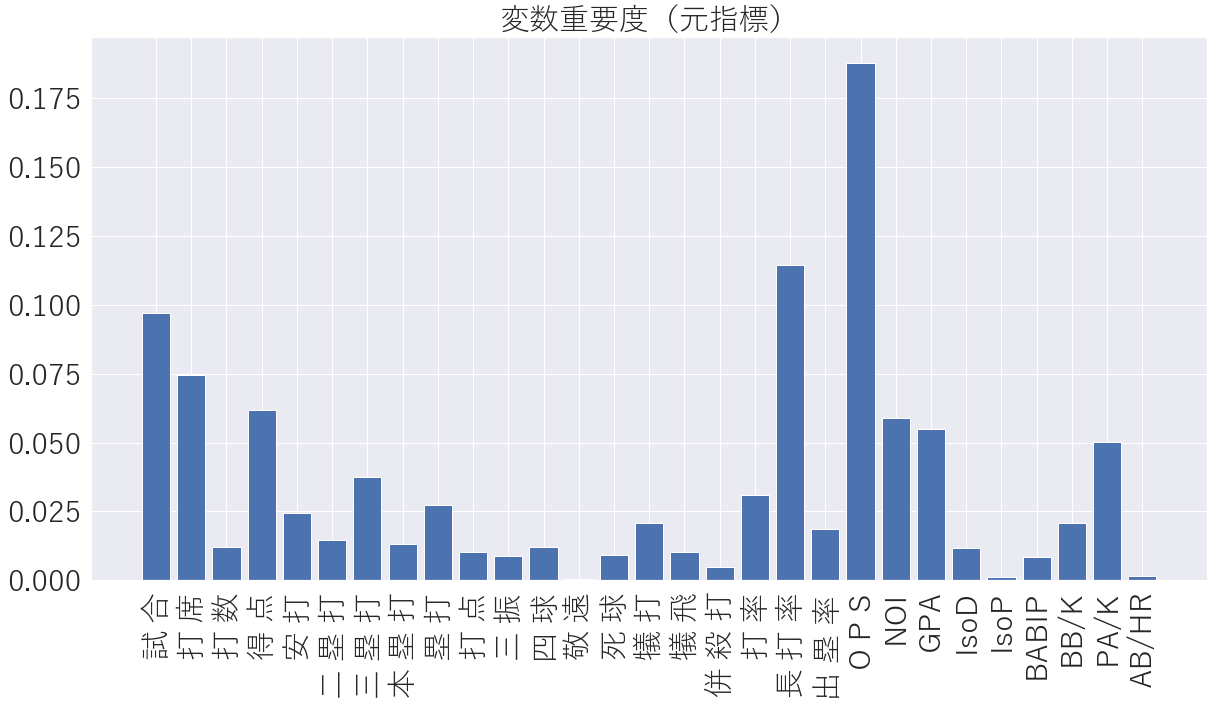

In [22]:
imp = RF_2.feature_importances_
plt.figure(figsize=(20,10))
plt.bar(X.columns,imp)
plt.xticks(rotation=90)
plt.tick_params(labelsize=30)
plt.title('変数重要度（元指標）',size=30)

In [23]:
RF_3 = RandomForestClassifier(max_depth=3,n_estimators=40)
RF_3.fit(X_train_1,Y_train_1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Text(0.5, 1.0, '変数重要度')

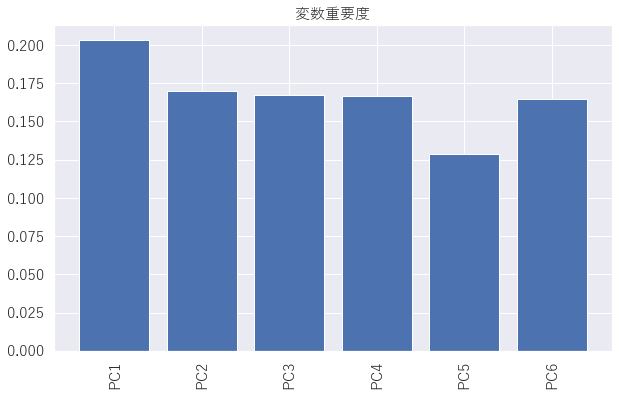

In [24]:
imp_1 = RF_3.feature_importances_
PC = pd.DataFrame(imp_1,index=['PC{}'.format(x+1) for x in range(6)],columns=['変数重要度'])
plt.figure(figsize=(10,6))
plt.bar(PC.index,imp_1)
plt.xticks(rotation=90)
plt.tick_params(labelsize=15)
plt.title('変数重要度',size=15)

In [25]:
PC

,変数重要度
PC1,0.203156
PC2,0.169876
PC3,0.167078
PC4,0.166917
PC5,0.128601
PC6,0.164373


In [26]:
PC_1 = pd.DataFrame(X_pc[:,:6],index=X.index,columns=PC.index)
PC_1.head()

,PC1,PC2,PC3,PC4,PC5,PC6
選 手 名,,,,,,
メヒア,7.686669,0.033002,-1.164163,-1.088923,-0.057339,0.464687
川瀬 晃,-0.668651,2.418526,3.436432,0.313958,0.405667,-0.687987
板山 祐太郎,1.149955,-1.432876,1.073466,-0.200575,-0.504172,-1.048251
釜元 豪,2.119830,-0.097917,0.167059,0.255832,-3.053780,2.180684
溝脇 隼人,-1.956981,1.917792,1.205992,-2.828252,-0.459812,-0.075035


In [27]:
X_st = pd.DataFrame(X_std,index=X.index,columns=X.columns)
X_st.head()

,試 合,打 席,打 数,得 点,安 打,二 塁 打,三 塁 打,本 塁 打,塁 打,打 点,...,出 塁 率,O P S,NOI,GPA,IsoD,IsoP,BABIP,BB/K,PA/K,AB/HR
選 手 名,,,,,,,,,,,,,,,,,,,,,
メヒア,-1.153040,-0.963105,-0.875969,0.631063,0.402329,1.088578,0.063512,2.326939,1.754733,1.291224,...,1.550777,2.774470,2.367504,2.580668,-0.443117,2.960701,1.139836,-0.265509,-0.301811,-0.582772
川瀬 晃,-0.094217,-0.445206,-0.593938,0.254975,-0.017272,-1.765916,0.531914,-1.197821,-0.914592,-0.453407,...,0.902931,-0.153104,0.290852,0.078433,0.369399,-1.301745,0.490885,1.707337,1.108371,2.805920
板山 祐太郎,0.038136,0.477301,0.516559,1.195195,0.821930,1.088578,0.531914,-0.316631,0.538332,-0.194943,...,0.454422,0.226876,0.333341,0.284286,0.130424,-0.117732,0.776423,0.021014,-0.460657,-0.389377
釜元 豪,-0.226570,-0.574681,-0.611565,0.819107,-0.257043,-0.542561,3.810724,0.212083,0.436965,0.192753,...,0.354753,0.883205,0.694498,0.790575,-0.060756,1.145215,1.317062,-0.716957,-0.997129,-0.506771
溝脇 隼人,-0.226570,-0.348100,-0.012249,-0.779267,0.222500,-0.542561,1.000315,-1.021583,-0.407758,-1.487262,...,-0.517348,-0.541721,-0.553618,-0.551646,-1.494610,-0.828140,-0.312192,0.237909,2.211317,0.466641


In [28]:
X_pc_std = pd.concat([X_st,PC_1],axis=1)
X_pc_std.head()

,試 合,打 席,打 数,得 点,安 打,二 塁 打,三 塁 打,本 塁 打,塁 打,打 点,...,BABIP,BB/K,PA/K,AB/HR,PC1,PC2,PC3,PC4,PC5,PC6
選 手 名,,,,,,,,,,,,,,,,,,,,,
メヒア,-1.153040,-0.963105,-0.875969,0.631063,0.402329,1.088578,0.063512,2.326939,1.754733,1.291224,...,1.139836,-0.265509,-0.301811,-0.582772,7.686669,0.033002,-1.164163,-1.088923,-0.057339,0.464687
川瀬 晃,-0.094217,-0.445206,-0.593938,0.254975,-0.017272,-1.765916,0.531914,-1.197821,-0.914592,-0.453407,...,0.490885,1.707337,1.108371,2.805920,-0.668651,2.418526,3.436432,0.313958,0.405667,-0.687987
板山 祐太郎,0.038136,0.477301,0.516559,1.195195,0.821930,1.088578,0.531914,-0.316631,0.538332,-0.194943,...,0.776423,0.021014,-0.460657,-0.389377,1.149955,-1.432876,1.073466,-0.200575,-0.504172,-1.048251
釜元 豪,-0.226570,-0.574681,-0.611565,0.819107,-0.257043,-0.542561,3.810724,0.212083,0.436965,0.192753,...,1.317062,-0.716957,-0.997129,-0.506771,2.119830,-0.097917,0.167059,0.255832,-3.053780,2.180684
溝脇 隼人,-0.226570,-0.348100,-0.012249,-0.779267,0.222500,-0.542561,1.000315,-1.021583,-0.407758,-1.487262,...,-0.312192,0.237909,2.211317,0.466641,-1.956981,1.917792,1.205992,-2.828252,-0.459812,-0.075035


In [29]:
X_train_2,X_test_2,Y_train_2,Y_test_2 = train_test_split(X_pc_std,Y,test_size=0.25)

In [30]:
RF_4 = RandomForestClassifier()
RF_4.fit(X_train_2,Y_train_2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
pre_2 = RF_4.predict(X_test_2)
acc_2 = accuracy_score(pre_2,Y_test_2)
auc_2 = roc_auc_score(pre_2,Y_test_2)
print('\t{0:5s} : {1:>0.5f}'.format('正解率',acc_2))
print('\t{0:5s} : {1:>0.5f}'.format('ＡＵＣ',auc_2))

	正解率   : 0.53333
	ＡＵＣ   : 0.52778


In [32]:
imp_2 = pd.DataFrame(RF_4.feature_importances_,index=X_pc_std.columns,columns=['変数重要度']).sort_values(by='変数重要度',ascending=False)
imp_2

,変数重要度
NOI,0.130966
長 打 率,0.080042
IsoP,0.076171
O P S,0.066497
得 点,0.064596
本 塁 打,0.060282
PC2,0.058656
PA/K,0.048943
PC5,0.046559
試 合,0.033522


In [33]:
imp_3 = np.array(imp_2).reshape(-1,)

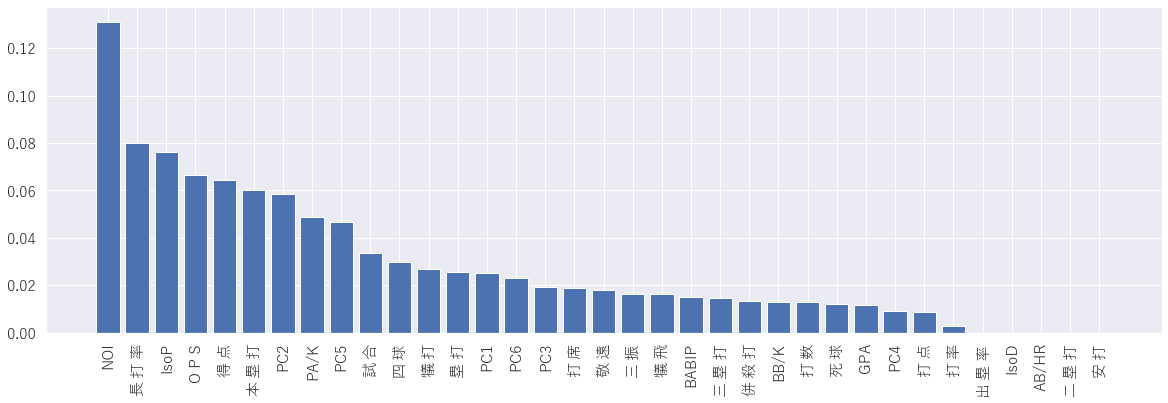

In [34]:
plt.figure(figsize=(20,6))
plt.bar(imp_2.index,imp_3)
plt.xticks(rotation=90)
plt.tick_params(labelsize=15)

In [35]:
X_3 = X_pc_std[imp_2.iloc[:16,:].index]
X_3.head()

,NOI,長 打 率,IsoP,O P S,得 点,本 塁 打,PC2,PA/K,PC5,試 合,四 球,犠 打,塁 打,PC1,PC6,PC3
選 手 名,,,,,,,,,,,,,,,,
メヒア,2.367504,3.050550,2.960701,2.774470,0.631063,2.326939,0.033002,-0.301811,-0.057339,-1.153040,-0.520092,-0.791235,1.754733,7.686669,0.464687,-1.164163
川瀬 晃,0.290852,-0.635298,-1.301745,-0.153104,0.254975,-1.197821,2.418526,1.108371,0.405667,-0.094217,0.675444,-0.013187,-0.914592,-0.668651,-0.687987,3.436432
板山 祐太郎,0.333341,0.094806,-0.117732,0.226876,1.195195,-0.316631,-1.432876,-0.460657,-0.504172,0.038136,0.974329,-0.791235,0.538332,1.149955,-1.048251,1.073466
釜元 豪,0.694498,1.036876,1.145215,0.883205,0.819107,0.212083,-0.097917,-0.997129,-3.053780,-0.226570,-0.221208,0.453641,0.436965,2.119830,2.180684,0.167059
溝脇 隼人,-0.553618,-0.493988,-0.828140,-0.541721,-0.779267,-1.021583,1.917792,2.211317,-0.459812,-0.226570,-1.217489,-0.480016,-0.407758,-1.956981,-0.075035,1.205992


In [36]:
X_train_3,X_test_3,Y_train_3,Y_test_3 = train_test_split(X_3,Y,test_size=0.25)

In [37]:
RF_5 = RandomForestClassifier()
RF_5.fit(X_train_3,Y_train_3)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
pre_3 = RF_5.predict(X_test_3)
acc_3 = accuracy_score(pre_3,Y_test_3)
auc_3 = roc_auc_score(pre_3,Y_test_3)
print('\t{0:5s} : {1:>0.5f}'.format('正解率',acc_3))
print('\t{0:5s} : {1:>0.5f}'.format('ＡＵＣ',auc_3))

	正解率   : 0.60000
	ＡＵＣ   : 0.78571


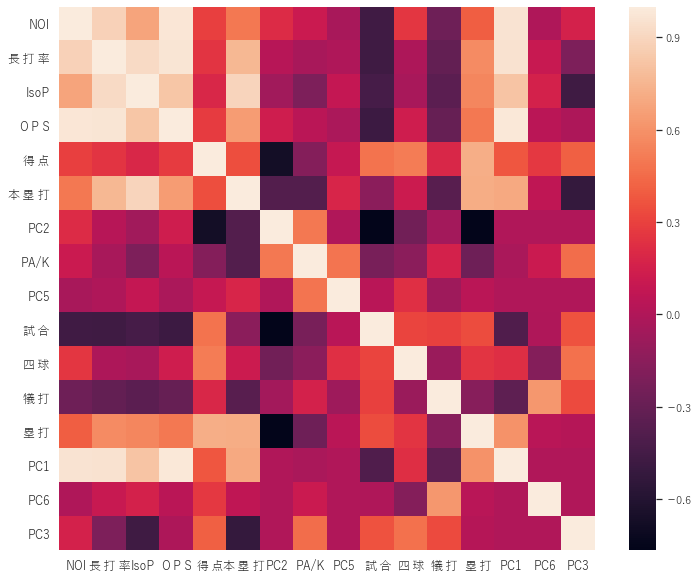

In [39]:
plt.figure(figsize=(12,10))
sns.heatmap(np.corrcoef(X_3.transpose()),xticklabels=X_3.columns,yticklabels=X_3.columns)
plt.tick_params(labelsize=12)

In [40]:
RF_6 = RandomForestClassifier()
RF_param_6 = {
    'max_depth' : [3,5,8,10,13,15],
    'n_estimators' : [20,40,60,80,100],
    'max_features' : [5,10,15]
}
RF_grid_6 = GridSearchCV(RF_6,RF_param_6)
RF_grid_6.fit(X_train_3,Y_train_3)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
           

In [41]:
pre_6 = RF_grid_6.predict(X_test_3)
acc_6 = accuracy_score(pre_6,Y_test_3)
auc_6 = roc_auc_score(pre_6,Y_test_3)
print('\t{0:5s} : {1:>0.5f}'.format('正解率',acc_6))
print('\t{0:5s} : {1:>0.5f}'.format('ＡＵＣ',auc_6))

	正解率   : 0.60000
	ＡＵＣ   : 0.78571
